# BTC

In [1]:
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Configure variables in a central place:
* `connection` - connection to the SQLite database
* `market` - string

In [2]:
connection = sqlite3.connect(os.path.expanduser('~/var/zanzibar/db/zanzibar.db'))

# Only change this:
market = 'BTC-EUR'

Fetch the data from the SQLite database and print an overview.

* Timestamp stores the local date/time (Europe/Amsterdam) in Unix epoch seconds (seconds since 1 january 1970 UTC). 

* Open is the openings price in EUR (€).

* High is the highest price in EUR (€)

* Low is the lowest price in EUR (€).

* Close is the closing price in EUR (€).

* Volume

In [3]:
btc = pd.read_sql_query(f'''
SELECT datetime(c.timestamp, 'unixepoch', 'localtime') as ts,
       c.open,
       c.high,
       c.low,
       c.close,
       c.volume
  FROM candles_1m c
  JOIN markets m
    ON m.id = c.market_id
   AND m.market = :market
''', connection, params={'market': market}, index_col='ts', parse_dates='{ts}: {%Y-%m-%d %H:%m:%s}')

btc

,open,high,low,close,volume
ts,,,,,
2021-09-28 20:15:00,35399.0,35400.0,35357.0,35357.0,0.135480
2021-09-28 20:16:00,35401.0,35442.0,35380.0,35425.0,0.760452
2021-09-28 20:17:00,35425.0,35433.0,35395.0,35399.0,0.191009
2021-09-28 20:18:00,35419.0,35467.0,35392.0,35417.0,0.151922
2021-09-28 20:19:00,35476.0,35496.0,35457.0,35490.0,0.038856
...,...,...,...,...,...
2021-10-01 13:06:00,40602.0,40698.0,40583.0,40634.0,0.892091
2021-10-01 13:07:00,40688.0,40861.0,40632.0,40832.0,2.763189
2021-10-01 13:08:00,40805.0,40832.0,40699.0,40783.0,1.710451


Plot the closing prices per minute for the market.

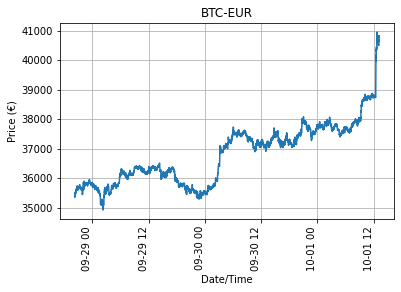

In [4]:
btc['close'].plot()

plt.title(market)
plt.xlabel('Date/Time')
plt.ylabel('Price (€)')
plt.xticks(rotation=90)
plt.grid()
plt.show()